# Временные ряды

In [130]:
import numpy as np
import pandas as pd
from numpy import cos
from numpy import sin
from numpy import abs
from numpy import pi
from numpy.random import random as rand
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

## 1. Сгенерировать временной ряд с трендом и сезонной составляющей. Добавить случайную погрешность для каждого значения ряда. Разбить выборку на две неравные части: одну для анализа, другую для проверки предсказаний. 

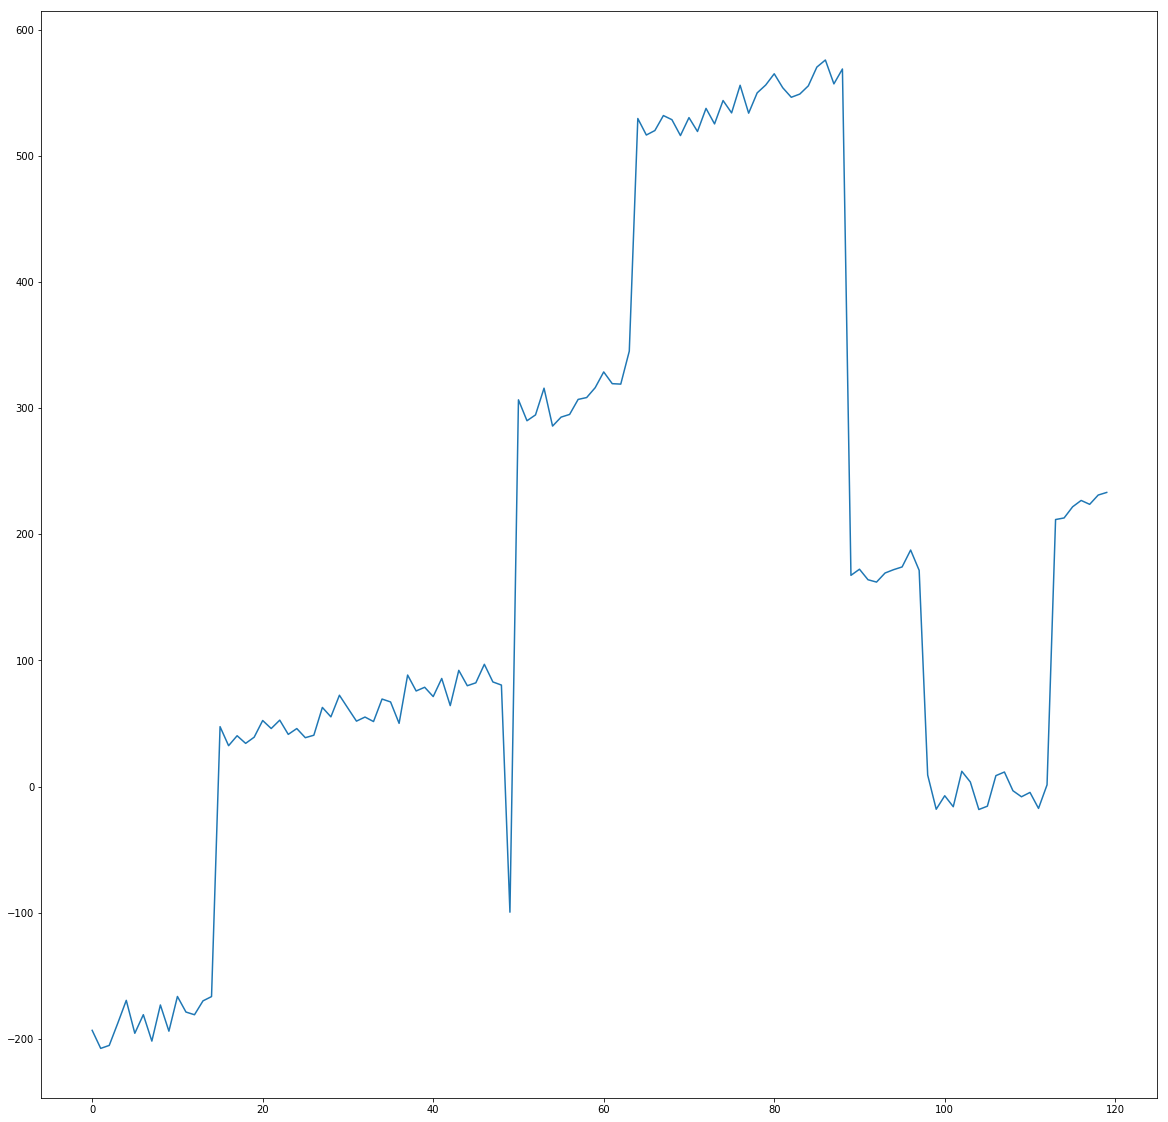

In [131]:
a = 1.9
N = 120
R = 1000 
x = [a*p for p in range(N)]
for i in range(N):
    x[i]-=0.2*R*((i%49) <15)
    x[i]+= 0.4*R*((i%120) in range(50,89))
for i in range(N):
    x[i]+= np.random.normal(scale = 10)
plt.figure(figsize=(20,20))
plt.plot(range(N),x)

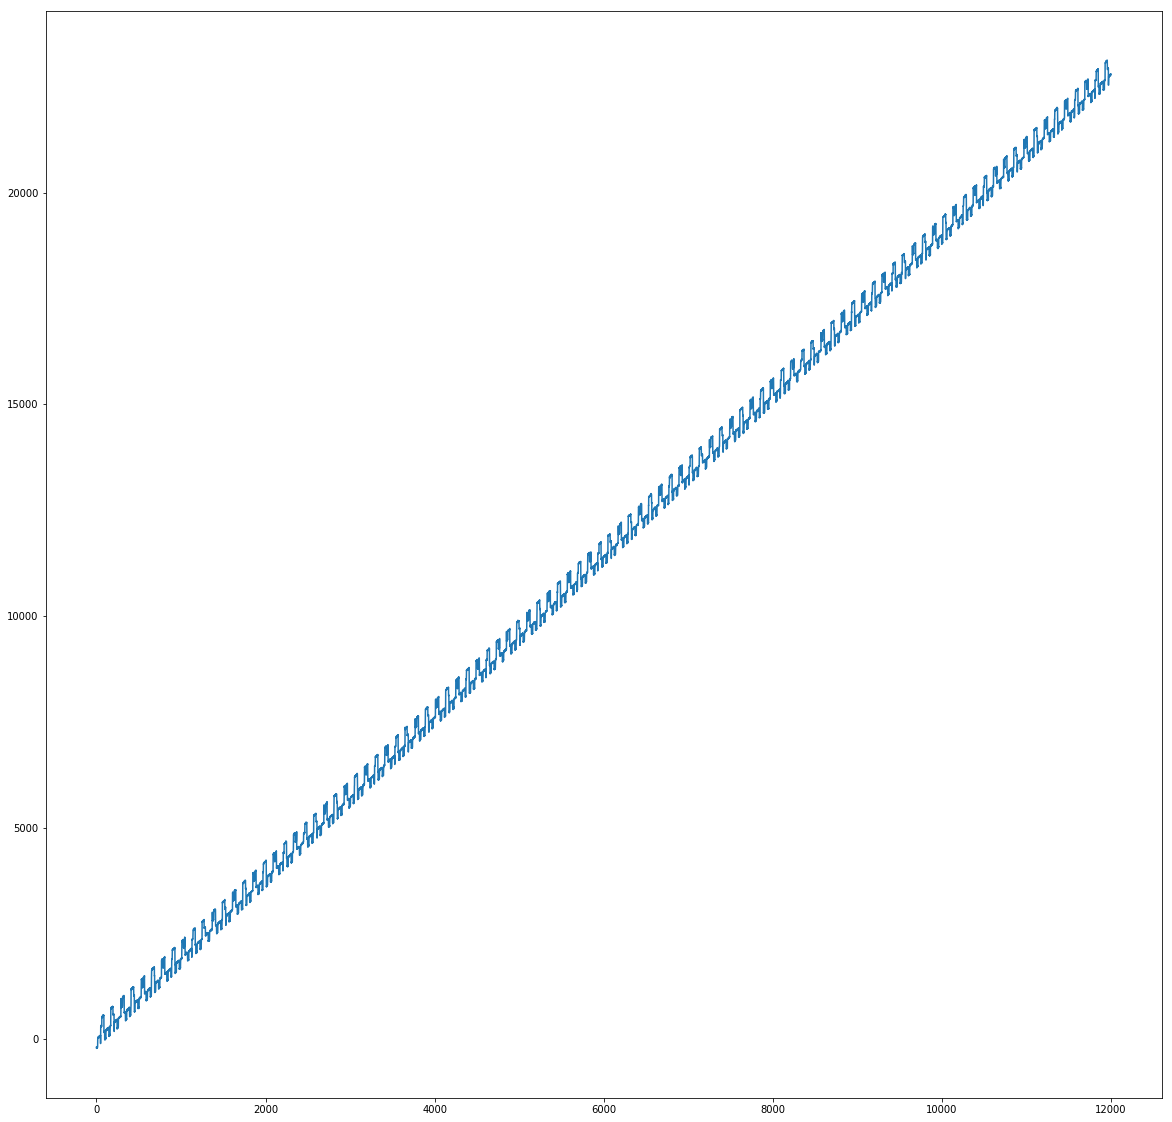

In [132]:
a = 1.9
N = 12000
R = 1000 
x = [a*p for p in range(N)]
for i in range(N):
    x[i]-=0.2*R*((i%49) <15)
    x[i]+= 0.4*R*((i%120) in range(50,89))
for i in range(N):
    x[i]+= np.random.normal(scale = 10)
plt.figure(figsize=(20,20))
plt.plot(range(N),x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


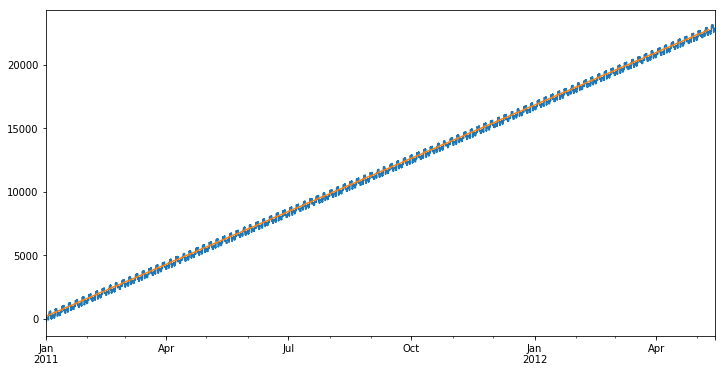

In [133]:
ts = pd.Series(x,index = pd.date_range('1/1/2011', periods=N, freq='H'))
ts.plot(figsize=(12,6))
ts1 = ts.resample('120H', how='mean')
ts1.plot(figsize=(12,6))

In [134]:
test = sm.tsa.adfuller(ts1)
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  0.461266534693
p-value:  0.983647041881
Critical values:  {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
есть единичные корни, ряд не стационарен


adf:  -9.12183446124
p-value:  3.18980851528e-15
Critical values:  {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
единичных корней нет, ряд стационарен


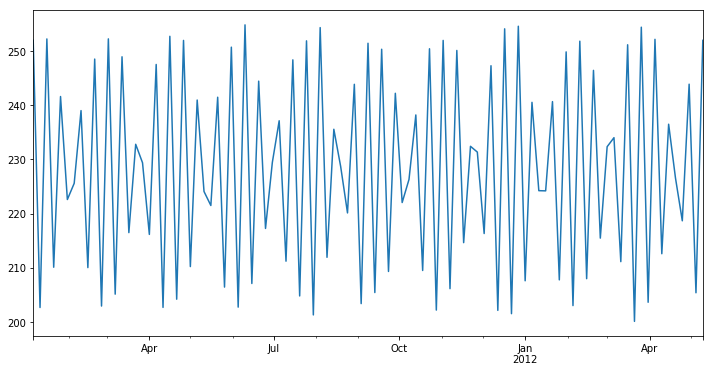

In [135]:
ts1diff = ts1.diff(periods=1).dropna()
test = sm.tsa.adfuller(ts1diff)
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')
ts1diff.plot(figsize=(12,6))

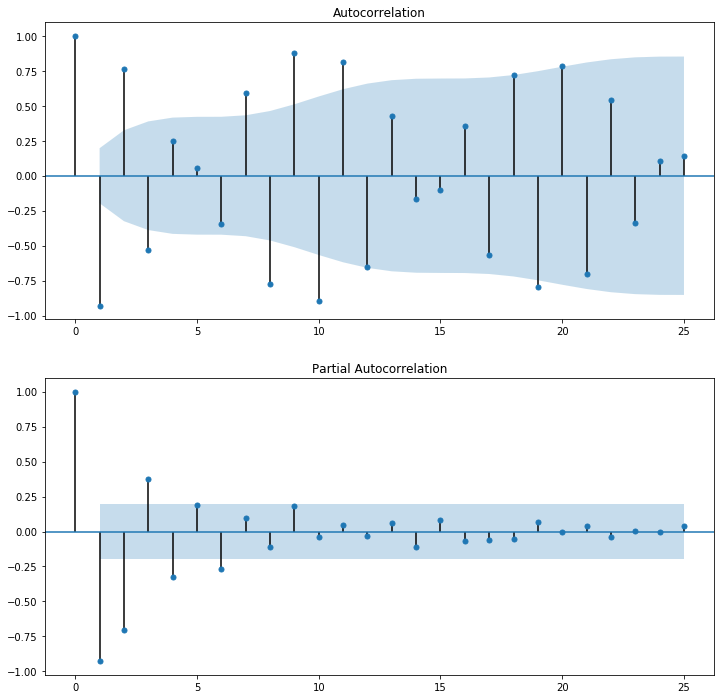

In [136]:
fig = plt.figure(figsize=(12,12))
ig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1diff, lags=25, ax=ax2)

In [137]:
ts

2011-01-01 00:00:00     -191.036598
2011-01-01 01:00:00     -205.152028
2011-01-01 02:00:00     -215.013448
2011-01-01 03:00:00     -187.189513
2011-01-01 04:00:00     -190.960486
2011-01-01 05:00:00     -187.847807
2011-01-01 06:00:00     -192.075865
2011-01-01 07:00:00     -187.990433
2011-01-01 08:00:00     -205.746940
2011-01-01 09:00:00     -186.546729
2011-01-01 10:00:00     -197.282022
2011-01-01 11:00:00     -186.375108
2011-01-01 12:00:00     -193.860996
2011-01-01 13:00:00     -179.474712
2011-01-01 14:00:00     -169.113059
2011-01-01 15:00:00       35.751529
2011-01-01 16:00:00       47.255181
2011-01-01 17:00:00       28.040778
2011-01-01 18:00:00       39.814156
2011-01-01 19:00:00       40.572421
2011-01-01 20:00:00       40.196681
2011-01-01 21:00:00       39.811654
2011-01-01 22:00:00       25.605576
2011-01-01 23:00:00       34.640162
2011-01-02 00:00:00       59.947987
2011-01-02 01:00:00       57.225735
2011-01-02 02:00:00       34.216478
2011-01-02 03:00:00       44


## 2. По анализу части выборки определить параметры временного ряда и выполнить предсказание. Проверить его на другой части выборки. Анализ выболнить для "зашумленного" и исходного рядов.

In [148]:
model = sm.tsa.ARIMA(ts, order=(4,1,3), freq='H').fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [149]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                11999
Model:                 ARIMA(4, 1, 3)   Log Likelihood              -67298.254
Method:                       css-mle   S.D. of innovations             65.985
Date:                Thu, 26 Oct 2017   AIC                         134614.509
Time:                        11:43:53   BIC                         134681.042
Sample:                    01-01-2011   HQIC                        134636.827
                         - 05-14-2012                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0219      0.584      3.460      0.001       0.877       3.167
ar.L1.D.y      0.2415      0.012     19.641      0.000       0.217       0.266
ar.L2.D.y      0.2656      0.003     78.154      0.000       0.259       0.272
ar.L3.D.y     -0.9899      0.003   -285.119      0.000      -0.997      -0.983
ar.L4.D.y     -0.0143      0.012     -1.168      0.243      -0.038       0.010
ma.L1.D.y     -0.2736      0.000   -759.987      0.000      -0.274      -0.273
ma.L2.D.y     -0.2729      0.000   -914.510      0.000      -0.273      -0.272
ma.L3.D.y      0.9987      0.001   1708.039      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6319           -0.7791j            1.0031           -0.1416
AR.2            0.6319           +0.7791j            1.0031            0.1416
AR.3           -1.0001           -0.0000j            1.0001           -0.5000
AR.4          -69.6273           -0.0000j           69.6273           -0.5000
MA.1           -1.0006           -0.0000j            1.0006           -0.5000
MA.2            0.6369           -0.7714j            1.0003           -0.1401
MA.3            0.6369           +0.7714j            1.0003            0.1401
-----------------------------------------------------------------------------
"""

In [150]:
pred = model.predict('2012-05-15','2012-12-01', typ='levels')

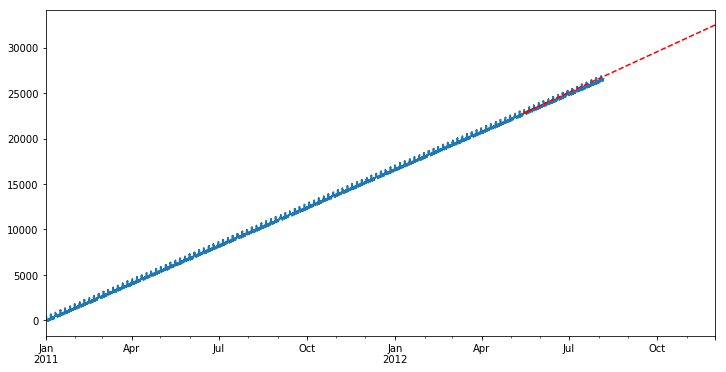

In [151]:
N_t = 14000
x_t = [a*p for p in range(N_t)]
for i in range(N_t):
    x_t[i]-=0.2*R*((i%49) <15)
    x_t[i]+= 0.4*R*((i%120) <20)
for i in range(N_t):
    x_t[i]+= np.random.normal(scale = 10)
ts_t = pd.Series(x_t,index = pd.date_range('1/1/2011', periods=N_t, freq='H'))
ts_t.plot(figsize=(12,6))
pred.plot(style='r--')